In [1]:
import pandas as pd

trips = pd.read_csv('trip.csv') 
weather = pd.read_csv('weather.csv')

In [2]:
trips['start_date'] = pd.to_datetime(trips['start_date'])
hours = pd.DatetimeIndex(trips['start_date']).hour
hours.name = 'hour'

In [3]:
train = pd.concat([trips, pd.DataFrame(hours, index=trips.index)], axis=1)
train.drop(train.columns[[0, 3, 5, 6, 7, 8, 9]], axis=1)

# Remove outliers
str(train['duration'].quantile(.995) / 3600) + " hours"
train = train[train.duration <= 21600 ] # 6 hours = 21600 seconds

In [4]:
# Weather find cleanest zipcode
zipcodes = weather.zip_code.unique()
for x in zipcodes:
    w = weather[weather.zip_code == x]
    print w.isnull().sum()
    

# Weather fill in nulls
events = weather.events.unique()
weather['events'].fillna('Normal', inplace=True)
weather['date'] = pd.to_datetime(weather['date'])

date                                0
max_temperature_f                   0
mean_temperature_f                  0
min_temperature_f                   0
max_dew_point_f                     0
mean_dew_point_f                    0
min_dew_point_f                     0
max_humidity                        0
mean_humidity                       0
min_humidity                        0
max_sea_level_pressure_inches       0
mean_sea_level_pressure_inches      0
min_sea_level_pressure_inches       0
max_visibility_miles                0
mean_visibility_miles               0
min_visibility_miles                0
max_wind_Speed_mph                  0
mean_wind_speed_mph                 0
max_gust_speed_mph                 13
precipitation_inches                0
cloud_cover                         0
events                            574
wind_dir_degrees                    0
zip_code                            0
dtype: int64
date                                0
max_temperature_f                   0

In [5]:
# Max Gust Speed MPH
print zipcodes
w = weather[weather.zip_code == 95113]


[94107 94063 94301 94041 95113]


In [6]:
# Max Wind Speed and Max Gust Speed
w.corr()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,cloud_cover,wind_dir_degrees,zip_code
max_temperature_f,1.000000,0.930792,0.697449,0.541871,0.490145,0.387621,-0.254428,-0.391906,-0.410626,-0.488092,...,-0.380934,0.011249,0.246963,0.329102,0.150098,0.116434,0.114828,-0.352031,0.291614,NaN
mean_temperature_f,0.930792,1.000000,0.910077,0.742369,0.712402,0.616494,-0.129996,-0.146784,-0.129931,-0.605795,...,-0.495074,-0.007824,0.187948,0.231993,0.306454,0.326707,0.269688,-0.112532,0.273966,NaN
min_temperature_f,0.697449,0.910077,1.000000,0.846057,0.845950,0.773615,0.033968,0.156444,0.210155,-0.640307,...,-0.543702,-0.025744,0.090464,0.083628,0.431873,0.510804,0.401052,0.176016,0.208662,NaN
max_dew_point_f,0.541871,0.742369,0.846057,1.000000,0.954819,0.853963,0.436992,0.470806,0.406442,-0.560137,...,-0.499230,-0.028882,-0.076824,-0.138886,0.329876,0.384029,0.296441,0.257281,0.124428,NaN
mean_dew_point_f,0.490145,0.712402,0.845950,0.954819,1.000000,0.951414,0.447220,0.551817,0.518943,-0.547265,...,-0.473214,-0.030819,-0.091180,-0.142004,0.272453,0.354231,0.237099,0.305943,0.101813,NaN
min_dew_point_f,0.387621,0.616494,0.773615,0.853963,0.951414,1.000000,0.400621,0.597307,0.618064,-0.491467,...,-0.417677,-0.037162,-0.085342,-0.126101,0.202317,0.306532,0.165520,0.327394,0.054136,NaN
max_humidity,-0.254428,-0.129996,0.033968,0.436992,0.447220,0.400621,1.000000,0.829645,0.559583,-0.050035,...,-0.097307,-0.062669,-0.408147,-0.521786,-0.028969,-0.005128,-0.029984,0.345776,-0.128109,NaN
mean_humidity,-0.391906,-0.146784,0.156444,0.470806,0.551817,0.597307,0.829645,1.000000,0.925774,-0.077088,...,-0.113363,-0.074127,-0.417485,-0.542462,0.058882,0.140445,0.054684,0.596909,-0.198319,NaN
min_humidity,-0.410626,-0.129931,0.210155,0.406442,0.518943,0.618064,0.559583,0.925774,1.000000,-0.082471,...,-0.103949,-0.069597,-0.345302,-0.454119,0.106707,0.212060,0.101720,0.652960,-0.209570,NaN
max_sea_level_pressure_inches,-0.488092,-0.605795,-0.640307,-0.560137,-0.547265,-0.491467,-0.050035,-0.077088,-0.082471,1.000000,...,0.935366,-0.020652,-0.087758,-0.067401,-0.389620,-0.460265,-0.390355,-0.008559,-0.025911,NaN


In [7]:
# Correlation is 94%
# Replace null in max_gust_speed with mean of max_wind_Speed

w.isnull().sum()

date                               0
max_temperature_f                  0
mean_temperature_f                 0
min_temperature_f                  0
max_dew_point_f                    0
mean_dew_point_f                   0
min_dew_point_f                    0
max_humidity                       0
mean_humidity                      0
min_humidity                       0
max_sea_level_pressure_inches      0
mean_sea_level_pressure_inches     0
min_sea_level_pressure_inches      0
max_visibility_miles               0
mean_visibility_miles              0
min_visibility_miles               0
max_wind_Speed_mph                 0
mean_wind_speed_mph                0
max_gust_speed_mph                12
precipitation_inches               0
cloud_cover                        0
events                             0
wind_dir_degrees                   0
zip_code                           0
dtype: int64

In [8]:
mean_wind = w['max_wind_Speed_mph'].mean()

In [9]:
w['max_gust_speed_mph'].fillna(inplace=True, value=mean_wind)

/Users/khalid/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
w.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
dtype: int64

In [11]:
train.head()
w.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
736,2013-08-29,81.0,72.0,63.0,62.0,61.0,59.0,87.0,69.0,51.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,Normal,320.0,95113
737,2013-08-30,88.0,76.0,63.0,63.0,60.0,55.0,93.0,65.0,37.0,...,10.0,10.0,18.0,5.0,22.0,0,2.0,Normal,316.0,95113
738,2013-08-31,80.0,71.0,62.0,59.0,57.0,54.0,90.0,66.0,42.0,...,10.0,10.0,18.0,8.0,22.0,0,0.0,Normal,309.0,95113
739,2013-09-01,81.0,72.0,62.0,61.0,57.0,51.0,84.0,62.0,39.0,...,10.0,10.0,20.0,7.0,24.0,0,2.0,Normal,308.0,95113
740,2013-09-02,79.0,73.0,66.0,62.0,61.0,59.0,81.0,68.0,54.0,...,10.0,10.0,21.0,8.0,25.0,T,5.0,Rain,315.0,95113


In [12]:
# Change start_date to be same as date in weather
train['start_date'] = train['start_date'].dt.strftime("%Y-%m-%d")

In [13]:
train.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,hour
0,4576,63,2013-08-29,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,14
1,4607,70,2013-08-29,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,14
2,4130,71,2013-08-29,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,10
3,4251,77,2013-08-29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,11
4,4299,83,2013-08-29,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,12


In [14]:
# Remove unnecessary columns in train
train.drop('start_station_name', axis=1, inplace=True)
train.drop('end_station_name', axis=1, inplace=True)
train.drop('id', axis=1, inplace=True)
train.drop('end_date', axis=1, inplace=True)
train.drop('bike_id', axis=1, inplace=True)

In [15]:
train['start_date'] = pd.to_datetime(train['start_date'])
train.head()

,duration,start_date,start_station_id,end_station_id,subscription_type,zip_code,hour
0,63,2013-08-29,66,66,Subscriber,94127,14
1,70,2013-08-29,10,10,Subscriber,95138,14
2,71,2013-08-29,27,27,Subscriber,97214,10
3,77,2013-08-29,10,10,Subscriber,95060,11
4,83,2013-08-29,66,67,Subscriber,94103,12


In [16]:
w.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
736,2013-08-29,81.0,72.0,63.0,62.0,61.0,59.0,87.0,69.0,51.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,Normal,320.0,95113
737,2013-08-30,88.0,76.0,63.0,63.0,60.0,55.0,93.0,65.0,37.0,...,10.0,10.0,18.0,5.0,22.0,0,2.0,Normal,316.0,95113
738,2013-08-31,80.0,71.0,62.0,59.0,57.0,54.0,90.0,66.0,42.0,...,10.0,10.0,18.0,8.0,22.0,0,0.0,Normal,309.0,95113
739,2013-09-01,81.0,72.0,62.0,61.0,57.0,51.0,84.0,62.0,39.0,...,10.0,10.0,20.0,7.0,24.0,0,2.0,Normal,308.0,95113
740,2013-09-02,79.0,73.0,66.0,62.0,61.0,59.0,81.0,68.0,54.0,...,10.0,10.0,21.0,8.0,25.0,T,5.0,Rain,315.0,95113


In [17]:
# Merge w and train Dataframes
new_train = train.merge(w, left_on='start_date', right_on='date', how='left')
new_train.head()

,duration,start_date,start_station_id,end_station_id,subscription_type,zip_code_x,hour,date,max_temperature_f,mean_temperature_f,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code_y
0,63,2013-08-29,66,66,Subscriber,94127,14,2013-08-29,81.0,72.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,Normal,320.0,95113
1,70,2013-08-29,10,10,Subscriber,95138,14,2013-08-29,81.0,72.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,Normal,320.0,95113
2,71,2013-08-29,27,27,Subscriber,97214,10,2013-08-29,81.0,72.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,Normal,320.0,95113
3,77,2013-08-29,10,10,Subscriber,95060,11,2013-08-29,81.0,72.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,Normal,320.0,95113
4,83,2013-08-29,66,67,Subscriber,94103,12,2013-08-29,81.0,72.0,...,10.0,10.0,16.0,7.0,24.0,0,4.0,Normal,320.0,95113


In [18]:
new_train.drop('date', axis=1, inplace=True)

In [19]:
new_train.drop('zip_code_y', axis=1, inplace=True)

In [20]:
new_train = new_train.merge(pd.get_dummies(new_train.events), left_index=True, right_index=True)

In [21]:
new_train.drop('events', axis=1, inplace=True)

In [22]:
new_train.head()

,duration,start_date,start_station_id,end_station_id,subscription_type,zip_code_x,hour,max_temperature_f,mean_temperature_f,min_temperature_f,...,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,Fog,Fog-Rain,Normal,Rain
0,63,2013-08-29,66,66,Subscriber,94127,14,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
1,70,2013-08-29,10,10,Subscriber,95138,14,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
2,71,2013-08-29,27,27,Subscriber,97214,10,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
3,77,2013-08-29,10,10,Subscriber,95060,11,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
4,83,2013-08-29,66,67,Subscriber,94103,12,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0


In [23]:
# Find median precipitation inches
rainfall = filter(lambda item: item != 'T' and float(item) != 0, new_train.precipitation_inches)
rainfall = map(lambda x: float(x), rainfall)
rainfall = sorted(rainfall)
median = rainfall[(len(rainfall)-1)/2]

In [24]:
# Replace 'T' with median since T most likely means True
new_prep_inch = new_train.precipitation_inches.replace('T', str(median))
new_prep_inch.value_counts()

0       571822
0.04     42687
0.01     14832
0.02      9426
0.1       3109
0.47      1960
0.08      1769
0.03      1673
0.14      1599
0.05      1544
0.29      1270
0.36      1173
0.09      1119
0.12       885
0.51       845
1.28       804
0.22       783
0.17       744
0.55       736
0.42       695
0.65       618
1.26       608
0.25       598
0.2        591
0.97       534
0.19       530
0.33       510
1.2        491
0.61       483
0.11       403
0.68       392
0.66       384
0.21       311
0.06       302
0.71       280
0.39       136
0.57       121
3.23       105
Name: precipitation_inches, dtype: int64

In [25]:
new_train.precipitation_inches = new_prep_inch

In [26]:
# Just a sanity check
#new_train.precipitation_inches.value_counts()

In [27]:
new_train.head()

,duration,start_date,start_station_id,end_station_id,subscription_type,zip_code_x,hour,max_temperature_f,mean_temperature_f,min_temperature_f,...,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,Fog,Fog-Rain,Normal,Rain
0,63,2013-08-29,66,66,Subscriber,94127,14,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
1,70,2013-08-29,10,10,Subscriber,95138,14,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
2,71,2013-08-29,27,27,Subscriber,97214,10,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
3,77,2013-08-29,10,10,Subscriber,95060,11,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
4,83,2013-08-29,66,67,Subscriber,94103,12,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0


In [28]:
date_sort = sorted(new_train.start_date)

In [29]:
#(date_sort[0] - date_sort[1]).days == 0
tmp_train = new_train[:100]
tmp_train = tmp_train.loc[tmp_train['start_date'] == date_sort[0]]
tmp_train.head()

,duration,start_date,start_station_id,end_station_id,subscription_type,zip_code_x,hour,max_temperature_f,mean_temperature_f,min_temperature_f,...,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,Fog,Fog-Rain,Normal,Rain
0,63,2013-08-29,66,66,Subscriber,94127,14,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
1,70,2013-08-29,10,10,Subscriber,95138,14,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
2,71,2013-08-29,27,27,Subscriber,97214,10,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
3,77,2013-08-29,10,10,Subscriber,95060,11,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
4,83,2013-08-29,66,67,Subscriber,94103,12,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0


In [30]:
from datetime import timedelta
date_sort[0] + timedelta(hours=14)

new_hour = new_train['hour']
new_hour = map(lambda x: timedelta(hours=x), new_hour)
new_train['start_date'] = new_train['start_date'] - new_hour

In [31]:
new_train.head()

,duration,start_date,start_station_id,end_station_id,subscription_type,zip_code_x,hour,max_temperature_f,mean_temperature_f,min_temperature_f,...,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,Fog,Fog-Rain,Normal,Rain
0,63,2013-08-28 10:00:00,66,66,Subscriber,94127,14,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
1,70,2013-08-28 10:00:00,10,10,Subscriber,95138,14,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
2,71,2013-08-28 14:00:00,27,27,Subscriber,97214,10,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
3,77,2013-08-28 13:00:00,10,10,Subscriber,95060,11,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
4,83,2013-08-28 12:00:00,66,67,Subscriber,94103,12,81.0,72.0,63.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0


In [32]:
new_train.drop('hour', axis=1, inplace=True)

In [33]:
new_train.head()

,duration,start_date,start_station_id,end_station_id,subscription_type,zip_code_x,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,...,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,Fog,Fog-Rain,Normal,Rain
0,63,2013-08-28 10:00:00,66,66,Subscriber,94127,81.0,72.0,63.0,62.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
1,70,2013-08-28 10:00:00,10,10,Subscriber,95138,81.0,72.0,63.0,62.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
2,71,2013-08-28 14:00:00,27,27,Subscriber,97214,81.0,72.0,63.0,62.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
3,77,2013-08-28 13:00:00,10,10,Subscriber,95060,81.0,72.0,63.0,62.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
4,83,2013-08-28 12:00:00,66,67,Subscriber,94103,81.0,72.0,63.0,62.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0


In [34]:
# Show trips per hour
new_train.start_date.value_counts()

2014-11-02 16:00:00    248
2014-11-04 16:00:00    244
2014-10-19 16:00:00    241
2015-06-07 16:00:00    239
2015-07-29 16:00:00    236
2014-11-05 16:00:00    235
2015-06-01 16:00:00    234
2015-08-17 16:00:00    232
2015-03-29 16:00:00    232
2015-07-07 16:00:00    231
2015-06-02 16:00:00    231
2014-09-16 16:00:00    230
2015-05-13 16:00:00    229
2015-01-20 16:00:00    228
2015-07-26 16:00:00    228
2015-08-30 16:00:00    227
2015-05-10 16:00:00    227
2015-06-21 16:00:00    226
2014-09-14 07:00:00    226
2015-08-03 16:00:00    226
2014-10-27 16:00:00    226
2015-08-16 16:00:00    226
2014-10-28 16:00:00    225
2014-10-15 16:00:00    224
2014-08-24 07:00:00    224
2015-06-08 16:00:00    224
2015-05-18 16:00:00    224
2015-08-26 16:00:00    224
2015-02-09 16:00:00    224
2015-05-12 16:00:00    223
                      ... 
2014-12-12 18:00:00      1
2014-03-29 20:00:00      1
2014-07-11 00:00:00      1
2013-10-03 20:00:00      1
2013-09-19 23:00:00      1
2015-05-15 18:00:00      1
2

In [35]:
# Drop station id columns, determined unnecessary
new_train.drop('start_station_id', axis=1, inplace=True)
new_train.drop('end_station_id', axis=1, inplace=True)

In [36]:
new_train.head()

,duration,start_date,subscription_type,zip_code_x,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,Fog,Fog-Rain,Normal,Rain
0,63,2013-08-28 10:00:00,Subscriber,94127,81.0,72.0,63.0,62.0,61.0,59.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
1,70,2013-08-28 10:00:00,Subscriber,95138,81.0,72.0,63.0,62.0,61.0,59.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
2,71,2013-08-28 14:00:00,Subscriber,97214,81.0,72.0,63.0,62.0,61.0,59.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
3,77,2013-08-28 13:00:00,Subscriber,95060,81.0,72.0,63.0,62.0,61.0,59.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0
4,83,2013-08-28 12:00:00,Subscriber,94103,81.0,72.0,63.0,62.0,61.0,59.0,...,16.0,7.0,24.0,0,4.0,320.0,0,0,1,0


In [37]:
new_train.rename(columns={'zip_code_x':'zip_code'}, inplace=True)

In [38]:
date_trips = new_train.start_date.value_counts()

In [39]:
date_trips_df = date_trips.to_frame()
date_trips_df['date'] = date_trips_df.index
date_trips_df.reset_index(level=date_trips_df.index.names, inplace=True)
cols = date_trips_df.columns.tolist()
cols = [cols[1], cols[0]]
date_trips_df = date_trips_df[cols]
date_trips_df.rename(columns={'start_date': 'count', 'date': 'start_date'}, inplace=True)

In [40]:
new_train = pd.merge(new_train, date_trips_df, on='start_date', how='left')

In [41]:
new_train.drop('duration', axis=1, inplace=True)
new_train.drop('zip_code', axis=1, inplace=True)
new_train.drop('subscription_type', axis=1, inplace=True)

In [42]:
uniq_train = new_train.drop_duplicates()
uniq_train = uniq_train.reset_index()
uniq_train.drop('index', axis=1, inplace=True)
uniq_train.dtypes

start_date                        datetime64[ns]
max_temperature_f                        float64
mean_temperature_f                       float64
min_temperature_f                        float64
max_dew_point_f                          float64
mean_dew_point_f                         float64
min_dew_point_f                          float64
max_humidity                             float64
mean_humidity                            float64
min_humidity                             float64
max_sea_level_pressure_inches            float64
mean_sea_level_pressure_inches           float64
min_sea_level_pressure_inches            float64
max_visibility_miles                     float64
mean_visibility_miles                    float64
min_visibility_miles                     float64
max_wind_Speed_mph                       float64
mean_wind_speed_mph                      float64
max_gust_speed_mph                       float64
precipitation_inches                      object
cloud_cover         

In [43]:
uniq_train['precipitation_inches'] = pd.to_numeric(uniq_train.precipitation_inches)
uniq_train['year'] = uniq_train['start_date'].dt.year - 2013
uniq_train['month'] = uniq_train['start_date'].dt.month
uniq_train['hour'] = uniq_train['start_date'].dt.hour
uniq_train['weekday'] = uniq_train['start_date'].dt.weekday

In [164]:
# (uniq_train[list(uniq_train.columns[1:])].head()).to_csv('sample_data.csv')
# 
# average trips per hour, two lines (weekday(0-4) and weekend(5-6))
# 
# filter by week day and weekend

#weekday_df = x_col.loc[(x_col['weekday'] != 5) & (x_col['weekday'] != 6)]
#weekend_df = x_col.loc[(x_col['weekday'] == 5) | (x_col['weekday'] == 6)]
#weekend_df.hour.value_counts()
#weekday_df.hour.value_counts()

day_dict = dict()
for j in range(0, 7):
    weekday_df = uniq_train.loc[uniq_train['weekday'] == j]
    keys = weekday_df.hour.unique()
    day2_dict = dict()
    for i in keys:
        tmp_df = weekday_df.loc[weekday_df['hour'] == i]
        sum1 = tmp_df['count'].sum()
        total = tmp_df.shape[0]
        day2_dict[i] = float(sum1) / total

    day_dict[j] = day2_dict

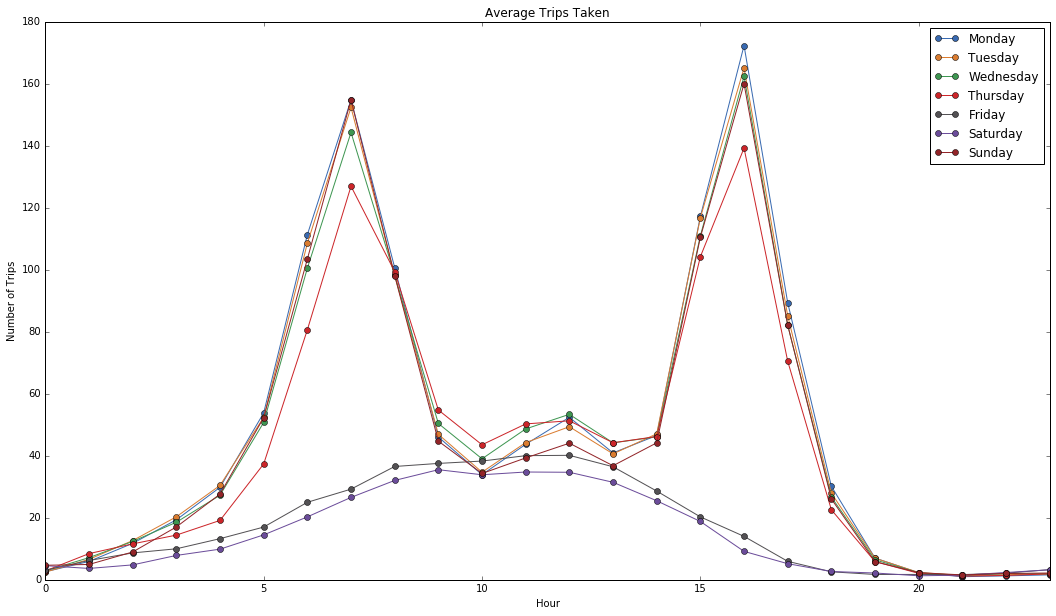

In [175]:
# Plot mean count per day
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(18, 10))
ax1 = plt.axes()
ax1.set_xlim(right=23)
ax1.set_title('Average Trips Taken')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of Trips')
ax1.plot(day_dict[0].keys(), day_dict[0].values(), 'o-', color=(57/255.0, 106/255.0, 177/255.0), label='Monday')
ax1.plot(day_dict[1].keys(), day_dict[1].values(), 'o-', color=(218/255.0, 124/255.0, 48/255.0), label='Tuesday')
ax1.plot(day_dict[2].keys(), day_dict[2].values(), 'o-', color=(62/255.0, 150/255.0, 81/255.0), label='Wednesday')
ax1.plot(day_dict[3].keys(), day_dict[3].values(), 'o-', color=(204/255.0, 37/255.0, 41/255.0), label='Thursday')
ax1.plot(day_dict[4].keys(), day_dict[4].values(), 'o-', color=(83/255.0, 81/255.0, 84/255.0), label='Friday')
ax1.plot(day_dict[5].keys(), day_dict[5].values(), 'o-', color=(107/255.0, 76/255.0, 154/255.0), label='Saturday')
ax1.plot(day_dict[6].keys(), day_dict[6].values(), 'o-', color=(146/255.0, 36/255.0, 40/255.0), label='Sunday')
ax1.legend()
plt.show()

In [94]:
##
#
# Train the model
#
##
features = list(uniq_train.columns[1:])
features.remove('count')
target = 'count'

x_col = uniq_train[features]
y_col = uniq_train[target]

x_col.head()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,cloud_cover,wind_dir_degrees,Fog,Fog-Rain,Normal,Rain,year,month,hour,weekday
0,81.0,72.0,63.0,62.0,61.0,59.0,87.0,69.0,51.0,30.06,...,4.0,320.0,0,0,1,0,0,8,10,2
1,81.0,72.0,63.0,62.0,61.0,59.0,87.0,69.0,51.0,30.06,...,4.0,320.0,0,0,1,0,0,8,14,2
2,81.0,72.0,63.0,62.0,61.0,59.0,87.0,69.0,51.0,30.06,...,4.0,320.0,0,0,1,0,0,8,13,2
3,81.0,72.0,63.0,62.0,61.0,59.0,87.0,69.0,51.0,30.06,...,4.0,320.0,0,0,1,0,0,8,12,2
4,81.0,72.0,63.0,62.0,61.0,59.0,87.0,69.0,51.0,30.06,...,4.0,320.0,0,0,1,0,0,8,6,2


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_col, y_col, test_size=0.25, random_state=42)

In [46]:
# # Tmp Regressor
# from sklearn.neighbors import KNeighborsRegressor
# clf = KNeighborsRegressor()
# clf.fit(X_train, y_train)

# clf.score(X_test, y_test)

In [87]:
# Optimize the Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer, median_absolute_error

parameters = {'n_estimators': [100, 150, 200], 'min_samples_leaf': [5], 'max_features': ['auto']}

reg = GridSearchCV(RandomForestRegressor(random_state=42, oob_score=True), parameters, scoring='neg_median_absolute_error', n_jobs=1, verbose=3)
reg.fit(X_train, y_train)
print(reg.best_estimator_)

# from sklearn.model_selection import cross_val_score
import numpy as np


# scores = cross_val_score(reg, X_train, y_train, cv=10, n_jobs=2, scoring = 'neg_median_absolute_error')
# print (np.median(scores) * -1)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] max_features=auto, n_estimators=100, min_samples_leaf=5 .........
[CV]  max_features=auto, n_estimators=100, min_samples_leaf=5, score=-4.189800 -   4.7s
[CV] max_features=auto, n_estimators=100, min_samples_leaf=5 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV]  max_features=auto, n_estimators=100, min_samples_leaf=5, score=-4.374855 -   4.6s
[CV] max_features=auto, n_estimators=100, min_samples_leaf=5 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.3s remaining:    0.0s


[CV]  max_features=auto, n_estimators=100, min_samples_leaf=5, score=-4.158190 -   4.7s
[CV] max_features=auto, n_estimators=150, min_samples_leaf=5 .........
[CV]  max_features=auto, n_estimators=150, min_samples_leaf=5, score=-4.153808 -   7.3s
[CV] max_features=auto, n_estimators=150, min_samples_leaf=5 .........
[CV]  max_features=auto, n_estimators=150, min_samples_leaf=5, score=-4.385972 -   7.3s
[CV] max_features=auto, n_estimators=150, min_samples_leaf=5 .........
[CV]  max_features=auto, n_estimators=150, min_samples_leaf=5, score=-4.183650 -   7.3s
[CV] max_features=auto, n_estimators=200, min_samples_leaf=5 .........
[CV]  max_features=auto, n_estimators=200, min_samples_leaf=5, score=-4.101597 -   9.8s
[CV] max_features=auto, n_estimators=200, min_samples_leaf=5 .........
[CV]  max_features=auto, n_estimators=200, min_samples_leaf=5, score=-4.396115 -   9.7s
[CV] max_features=auto, n_estimators=200, min_samples_leaf=5 .........
[CV]  max_features=auto, n_estimators=200, min

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)


In [92]:
forest_reg = RandomForestRegressor(random_state = 42, oob_score = True)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_train)
print("Untuned median absolute score: ", median_absolute_error(y_train, y_pred))
f_reg = RandomForestRegressor(random_state = 42, oob_score = True, n_estimators = 200, min_samples_leaf = 5, max_features = 'auto')
f_reg.fit(X_train, y_train)
y_pred2 = f_reg.predict(X_train)
print("Tuned median absolute score: ", median_absolute_error(y_train, y_pred2))
forest_reg = RandomForestRegressor(random_state = 42, oob_score = True)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)
print("Untuned median absolute score: ", median_absolute_error(y_test, y_pred))
f_reg = RandomForestRegressor(random_state = 42, oob_score = True, n_estimators = 200, min_samples_leaf = 5, max_features = 'auto')
f_reg.fit(X_train, y_train)
y_pred2 = f_reg.predict(X_test)
print("Tuned median absolute score: ", median_absolute_error(y_test, y_pred2))

('Untuned median absolute score: ', 1.5999999999999943)
('Tuned median absolute score: ', 2.6729792859172861)
('Untuned median absolute score: ', 4.5)
('Tuned median absolute score: ', 4.1634717153761116)


In [104]:
rand_test_data = uniq_train.sample(n=100, random_state=33)
test_colx = rand_test_data[features]
test_coly = rand_test_data[target]

y_pred3 = f_reg.predict(test_colx)
print("Robustness Median Score", median_absolute_error(test_coly, y_pred3))

('Robustness Median Score', 3.1364853632886884)


In [83]:
importances = forest_reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_reg.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

col_name = list(X_train.columns.values)

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], col_name[indices[f]]))

# Plot the feature importances of the forest
import matplotlib.pyplot as plt
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.yscale('log')
plt.savefig("feature_important.png")

Feature ranking:
1. feature 27 (0.676732) hour
2. feature 28 (0.166133) weekday
3. feature 25 (0.036103) year
4. feature 26 (0.017804) month
5. feature 0 (0.014069) max_temperature_f
6. feature 1 (0.012280) mean_temperature_f
7. feature 20 (0.007955) wind_dir_degrees
8. feature 2 (0.006829) min_temperature_f
9. feature 19 (0.005728) cloud_cover
10. feature 18 (0.004763) precipitation_inches
11. feature 5 (0.004438) min_dew_point_f
12. feature 3 (0.004223) max_dew_point_f
13. feature 17 (0.004197) max_gust_speed_mph
14. feature 4 (0.003957) mean_dew_point_f
15. feature 6 (0.003809) max_humidity
16. feature 11 (0.003807) min_sea_level_pressure_inches
17. feature 15 (0.003800) max_wind_Speed_mph
18. feature 9 (0.003574) max_sea_level_pressure_inches
19. feature 16 (0.003526) mean_wind_speed_mph
20. feature 8 (0.003440) min_humidity
21. feature 10 (0.003357) mean_sea_level_pressure_inches
22. feature 14 (0.003184) min_visibility_miles
23. feature 7 (0.003160) mean_humidity
24. feature 13 (

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor

# KNN_reg = KNeighborsRegressor()
# scores = cross_val_score(KNN_reg, X_train, y_train, cv=10, n_jobs=2, scoring = 'neg_median_absolute_error')
# print (np.median(scores) * -1)

In [ ]:
# from sklearn.linear_model import Lasso

# lasso_reg = Lasso()
# scores = cross_val_score(lasso_reg, X_train, y_train, cv=10, n_jobs=2, scoring = 'neg_median_absolute_error')
# print (np.median(scores) * -1)

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier

# KNN_reg = AdaBoostClassifier()
# scores = cross_val_score(KNN_reg, X_train, y_train, cv=10, n_jobs=2, scoring = 'neg_median_absolute_error')
# print (np.median(scores) * -1)

In [ ]:
# from sklearn.svm import SVR

# KNN_reg = SVR(kernel='rbf')
# scores = cross_val_score(KNN_reg, X_train, y_train, cv=10, n_jobs=2, scoring = 'neg_median_absolute_error')
# print (np.median(scores) * -1)